In [2]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import regex
import numpy as np

import libraries 

In [3]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


load reader

In [12]:
IMAGE_PATH = r"C:\Users\khale\Desktop\fyp\test-STUFF\dataset-dates\training\29.jpg"
result = reader.readtext(IMAGE_PATH)
print(result)

[([[2546, 566], [2635, 566], [2635, 688], [2546, 688]], '5', 0.9968092899869454), ([[783, 716], [2373, 716], [2373, 853], [783, 853]], 'A consommer de preference avant le :', 0.6963475607266221), ([[1291, 954], [1471, 954], [1471, 1071], [1291, 1071]], '0 1', 0.6282479310864488), ([[1822, 945], [1995, 945], [1995, 1086], [1822, 1086]], '20', 0.9975268766655592), ([[2536, 883], [2810, 883], [2810, 1079], [2536, 1079]], 'de', 0.9996836604120953), ([[1018, 1052], [1764, 1052], [1764, 1227], [1018, 1227]], '250818ES', 0.9971015483542333), ([[1830, 1047], [2293, 1047], [2293, 1195], [1830, 1195]], '11:45', 0.8975239495602862), ([[1829, 2108], [1930, 2108], [1930, 2160], [1829, 2160]], 'S', 0.022083513631528717), ([[1962, 2084], [2332, 2084], [2332, 2160], [1962, 2160]], 'M ', 0.005606091773239663)]


read text from images

In [13]:
for text in result:
    pattern = regex.find_date_true(text[1])
    if (pattern is not None):
        print(pattern)

In [14]:
for text in result:
    pattern = regex.find_date_test_CMP1(text[1])
    if (pattern is not None):
        print(pattern)

250818


In [15]:
for text in result:
    pattern = regex.find_date_Improved1(text[1])
    if (pattern is not None):
        print(pattern)

11:45


print found pattern + accuracy

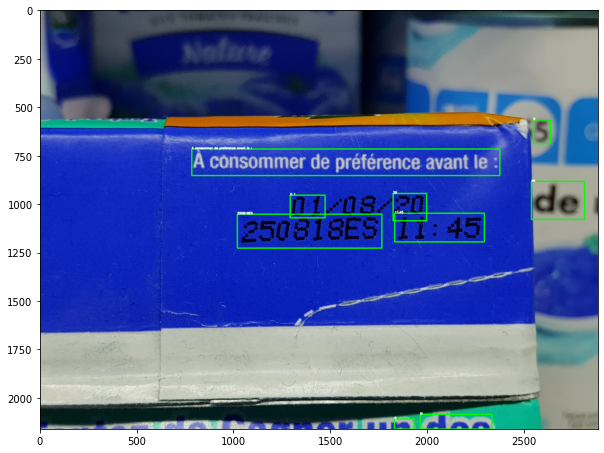

In [16]:
img = cv2.imread(IMAGE_PATH)
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 5)
    img = cv2.putText(img, text, top_left, font, .5, (255, 255, 255), 2, cv2.LINE_AA)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()